#### Recap

`plane` wave

$$\boxed{e^{i \textbf{k} \cdot \textbf{r}}=e^{i(k_x x +k_y y +k_z z)}}$$

* Any $\textbf{r}$ having a `constant` dot-product with $\textbf{k}$ (i.e., constant phase) lies on a line/plane perpendicular to $\textbf{k}$
* As a result, for time-dependent expression $e^{i (\textbf{k} \cdot \textbf{r} - \omega t)}$, $\textbf{k}$ is the `propagation direction` and line/plane of constant phase is `wavefront`
* `Wave number` $|\textbf{k}|=\frac{2\pi}{\lambda}$, and `phase velocity` $c=\frac{\omega}{|\textbf{k}|}$

`spherical` wave

$$\boxed{U(\mathbf{r})=\frac{e^{i k |\textbf{r}|}}{4\pi|\mathbf{r}|}}$$

* All $\textbf{r}$ having a `constant` distance from origin form a wavefront (i.e., a sphere)

* `Wave number` $k=\frac{2\pi}{\lambda}$, and `phase velocity` $c=\frac{\omega}{k}$, here, there's no need to specifify $k$ as a vector as the propagation direction is either $\mathbf{r}$ (for source) or $-\mathbf{r}$ (for sink)

`Huygens` principle

$$\boxed{U(\mathbf{r})=\frac{1}{\lambda} \cos(\chi) \frac{e^{i (k |\textbf{r}|-\frac{\pi}{2})}}{4\pi|\mathbf{r}|}}$$

where $\chi$ is the angle between the normal of the primary wavefront and the normal of the secondary wavefront

#### Double slit with `point source`

In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [5]:
def double_slit_setup(ax, x, title):

    # add slits, screen, and horizontal line
    ax.plot([-5, 0], [0, 0], 'w--')
    ax.plot([-5,-5], [3, 0.6], 'w', linewidth=2)
    ax.plot([-5,-5], [0.4, -0.4], 'w', linewidth=2)
    ax.plot([-5,-5], [-0.6, -3], 'w', linewidth=2)
    ax.plot([0,0], [3, -3], 'w', linewidth=2)

    # slit-screen distance
    ax.plot([-5, -0], [-2, -2], 'w-', linewidth=1)
    ax.text(-2.5, -2.3, r'$L$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')
    ax.arrow(-5+0.3, -2, -0.001, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')
    ax.arrow(0-0.3, -2, 0.001, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')

    # # slit-slit distance
    ax.plot([-5.5, -3], [0.5, 0.5], 'w--', linewidth=1)
    ax.plot([-5.5, -3], [-0.5, -0.5], 'w--', linewidth=1)
    ax.plot([-5.2, -5.2], [0.5, -0.5], 'w-', linewidth=1)
    ax.text(-5.5, 0, r'$d$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')
    ax.arrow(-5.2, 0.5-0.3, 0, 0,  head_width=0.1, head_length=0.3, fc='w', ec='none')
    ax.arrow(-5.2, -0.5+0.3, 0, -0.001,  head_width=0.1, head_length=0.3, fc='w', ec='none')

    # two rays
    ax.plot([-5, 0], [0.5, x], 'r-', linewidth=2)
    ax.plot([-5, 0], [-0.5, x], 'c-', linewidth=2)
    ax.text(0.3, x, r'$x$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')

    # two theta
    if x > 0.5:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(x-0.5, 5)), color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(x+0.5, 5)), color='c', linewidth=2)
    elif x < -0.5:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(-x+0.5, 5)), theta2=0, color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(-x-0.5, 5)), theta2=0, color='c', linewidth=2)
    else:
        arc_theta_1 = Arc([-5, 0.5], 3, 3, theta1=-np.rad2deg(np.arctan2(0.5-x, 5)), theta2=0, color='r', linewidth=2)
        arc_theta_2 = Arc([-5, -0.5], 3, 3, theta1=0, theta2=np.rad2deg(np.arctan2(0.5+x, 5)), color='c', linewidth=2)
    ax.add_patch(arc_theta_1)
    ax.add_patch(arc_theta_2)
    ax.text(-2.5, 0.5, r'$\theta_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='r')
    ax.text(-2.5, -0.5, r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='c')


    ax.set_xlim(-6, 1)
    ax.set_ylim(-3, 2)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('z')
    ax.set_ylabel('x')
    # ax.legend()

    # ax.grid(True)
    # ax.axis('off')
    if title:
        ax.set_title(title, fontsize=12)

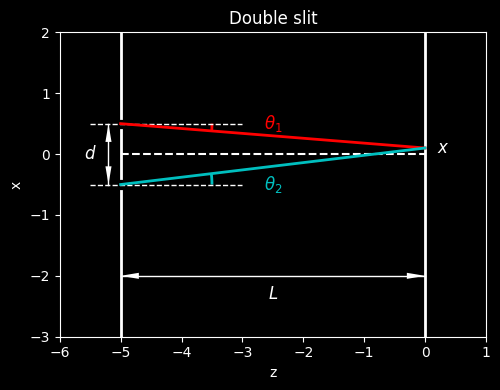

In [6]:
fig_1, ax_1 = plt.subplots(figsize=(8,4))
double_slit_setup(ax_1, x=0.1, title='Double slit')

plt.tight_layout()
plt.show()

If we consider a point around the `center` of the screen ($z=0$) that is `very far` away from two narrow slits

* `paraxial approximation` and $L\gg d$,
* each slit is a `point source` only emitting one spherical wave

then at that local region on screen, spherical waves from two slits can be approximated as `plane waves`

$$\begin{align}
U_1(x, z)&=e^{i(k_{x,1}x+k_{z,1}z)}=e^{i\frac{2\pi}{\lambda}(x\sin{\theta_1}+z\cos{\theta_1)}}\approx e^{i\frac{2\pi}{\lambda}\left(-x\frac{d/2}{L}\right)}\\
U_2(x, z)&=e^{i(k_{x,2}x+k_{z,2}z)}=e^{i\frac{2\pi}{\lambda}(x\sin{\theta_2}+z\cos{\theta_2)}}\approx e^{i\frac{2\pi}{\lambda}\left(x\frac{d/2}{L}\right)}
\end{align}$$

As a result, the intensity at location $x$ at that region (where essentially $L \gg x$) is

$$\begin{align}I(x, z=0)&=|U_1(x,0)+U_2(x,0)|^2\\
&=\left(e^{i\frac{2\pi}{\lambda}\left(-x\frac{d/2}{L}\right)}+e^{i\frac{2\pi}{\lambda}\left(x\frac{d/2}{L}\right)}\right)\cdot\left(e^{-i\frac{2\pi}{\lambda}\left(-x\frac{d/2}{L}\right)}+e^{-i\frac{2\pi}{\lambda}\left(x\frac{d/2}{L}\right)}\right)\\
&=2+e^{-2i\frac{2\pi}{\lambda}\left(x\frac{d/2}{L}\right)}+e^{2i\frac{2\pi}{\lambda}\left(x\frac{d/2}{L}\right)}\\
&=2+e^{-2i\frac{\pi d}{\lambda L}x}+e^{2i\frac{\pi d}{\lambda L}x}\\
&=2+2\cos\left(\frac{2\pi d}{\lambda L}x\right)\\
&=\boxed{4\cos^2\left(\frac{\pi d}{\lambda L}x\right)}
\end{align}$$

This is the same result as from `ft_ex_01`, with $b=d$ and $\sin \theta \approx \frac{x}{L}$

So, condition for `constructive interference` is

$$\frac{d}{\lambda L}x=m,\, m=...,-2,-1,0,1,2,...$$

or

$$\boxed{x=m\frac{\lambda L}{d}}$$

and for `destructive interference`

$$\boxed{x=\left(m+\frac{1}{2}\right)\frac{\lambda L}{d}}$$

`Alternatively`, we can just consider the locations on the screen for constructive and destructive interference by analyzing the difference in two ray paths

As we assume $L$ is large such that

$$\delta=d\sin \theta\approx d\frac{x}{L}$$

Apparently, here we require $L \gg x$

Then, for `constructive` pattern, we need

$$\delta=m\lambda \Rightarrow \boxed{x=m\frac{\lambda L}{d}}$$

For `destructive` pattern

$$\delta=\left(m+\frac{1}{2}\right)\lambda \Rightarrow \boxed{x=\left(m+\frac{1}{2}\right)\frac{\lambda L}{d}}$$

Same results as previous analysis

Finally, we look at width of peaks, that is the distance between two destructive points

$$\boxed{\Delta x=\frac{\lambda L}{d}}$$

So, when slit-screen distance $\uparrow$, wavelength $\uparrow$, slit distance d $\downarrow$, the interference pattern gets $\uparrow$ `wider`

Notice the `inverse relationship` between $x$ and $d$, which will occur frequently

In [7]:
x = np.linspace(-5e-2, 5e-2, 1000)
slit_d = 1e-3 # 1 mm
slit_screen_l = 20
wavelength = {'red': 6.9e-7,
              'orange': 6.1e-7,
              'yellow': 5.8e-7,
              'green': 5.3e-7,
              'cyan': 4.9e-7,
              'blue': 4.7e-7}

def double_slit_pattern(
    color_list,
    x=x,
    slit_d=slit_d,
    slit_screen_l=slit_screen_l,
    wavelength=wavelength
    ):
    if color_list is not None:
        fig_2, ax_2 = plt.subplots(figsize=(10,4))
    for color in color_list:
        pattern = 4*np.cos(np.pi*slit_d*x/(slit_screen_l*wavelength[color]))**2
        pattern_width = wavelength[color]*slit_screen_l/slit_d
        print(f'{color}: Peak width: {pattern_width}, Half width: {pattern_width/2}')
        ax_2.plot(x, pattern, color=color, label=f'{color}: {wavelength[color]} m')
        ax_2.plot([pattern_width/2, pattern_width/2], [-0.1,pattern.max()], color=color, ls='--') # peak half width

    ax_2.set_xlabel('x')
    ax_2.set_ylabel('Intensity')
    ax_2.legend(loc='upper right')
    ax_2.set_title('Interference pattern, double slit')
    plt.tight_layout()
    plt.show()

red: Peak width: 0.0138, Half width: 0.0069
yellow: Peak width: 0.0116, Half width: 0.0058
cyan: Peak width: 0.0098, Half width: 0.0049


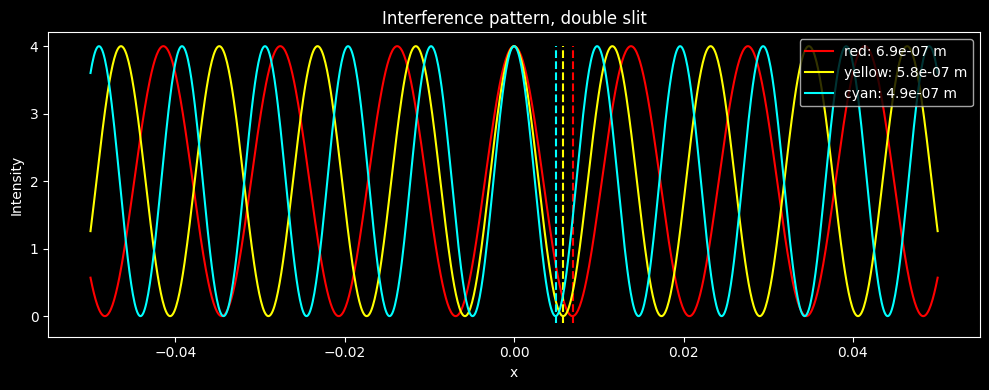

In [9]:
double_slit_pattern(['red', 'yellow', 'cyan'])